Some example ways to use the stellar density maps.

In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
%matplotlib inline
from lsst.sims.utils import _raDec2Hpid

In [5]:
filters = ['u', 'g', 'r', 'i', 'z', 'y']

filterName = filters[2]
# Load up the data, copy the keys into variables
data = np.load('../StarMaps/starDensity_%s_nside_64.npz' % filterName)
# Cumulative number counts, units of stars/sq deg. Array at healpix locations
starDensity = data['starDensity'].copy()
# magnitude bins 
bins=data['bins'].copy()
# pixels where there were so many stars some were skipped
mask = data['overMaxMask']

Exception ignored in: <bound method NpzFile.__del__ of <numpy.lib.npyio.NpzFile object at 0x7fe238c11ef0>>
Traceback (most recent call last):
  File "/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/numpy/lib/npyio.py", line 208, in __del__
    self.close()
  File "/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/numpy/lib/npyio.py", line 199, in close
    if self.zip is not None:
AttributeError: 'NpzFile' object has no attribute 'zip'


In [6]:
def stars_at_point(starmap, bins, maglimit):
    """
    compute the cumulative number of stars at a number of ra, dec positions
    """
    # at (0,0)-the main survey, (b=10, l=0)-MW confusion zone, (0,-75)-south
    ra = np.radians(np.array([0., 257.11054528, 0.]))
    dec = np.radians(np.array([0., -23.40974272, -75.]))
    hpids = _raDec2Hpid(64, ra, dec)

    results = []
    for hpid in hpids:
        results.append(np.interp(maglimit, bins[1:], starmap[hpid,:]))
    
    return results


/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


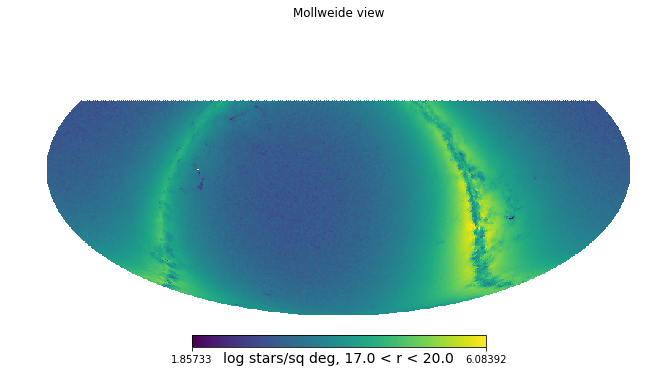

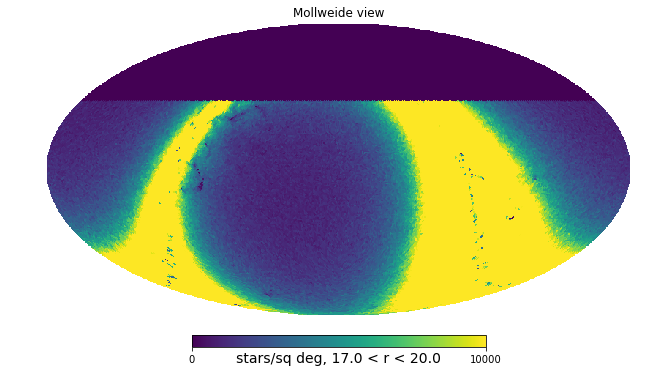

In [7]:
result_table = []
m1 = 17.
m2 = 20.
m_floor = np.where(bins <= m1)[0].max()
m_ceil = np.where(bins >= m2)[0].min()-1
starmap = starDensity[:,m_ceil+1] - starDensity[:,m_floor+1]
hp.mollview(np.log10(starmap), unit='log stars/sq deg, %.1f < r < %.1f' % (bins[m_floor], bins[m_ceil]))
hp.mollview(starmap, unit='stars/sq deg, %.1f < r < %.1f' % (bins[m_floor], bins[m_ceil]), max=10000)
result_table.append(stars_at_point(starDensity, bins, m2))

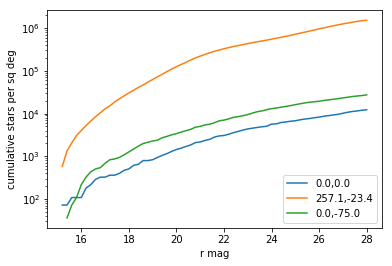

In [8]:
ra = np.array([0., 257.11054528, 0.])
dec = np.array([0., -23.40974272, -75.])
hpids = _raDec2Hpid(64, np.radians(ra), np.radians(dec))

for i,hpid in enumerate(hpids):
    plt.semilogy(bins[1:], starDensity[hpid,:], label='%.1f,%.1f' %(ra[i], dec[i]))
    plt.xlabel('r mag')
    plt.ylabel('cumulative stars per sq deg')

plt.legend(loc='lower right')

/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


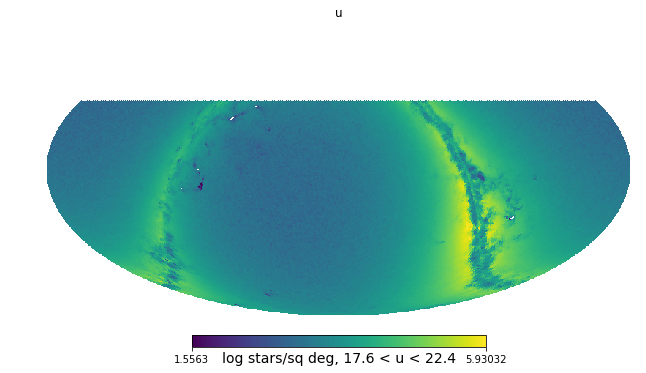

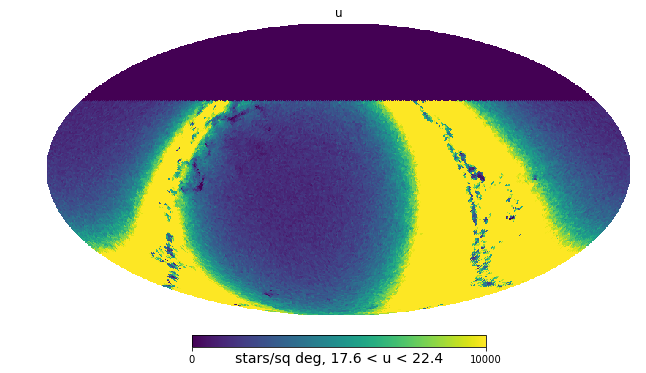

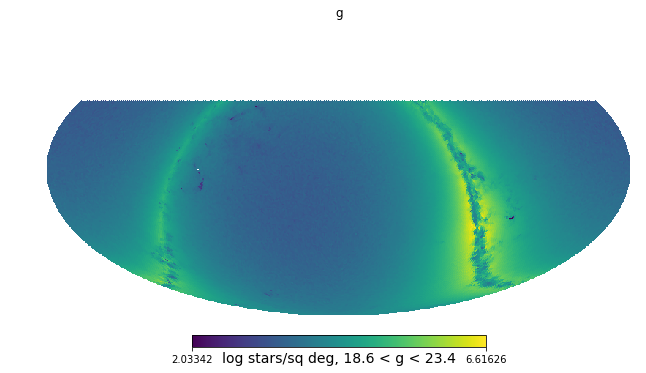

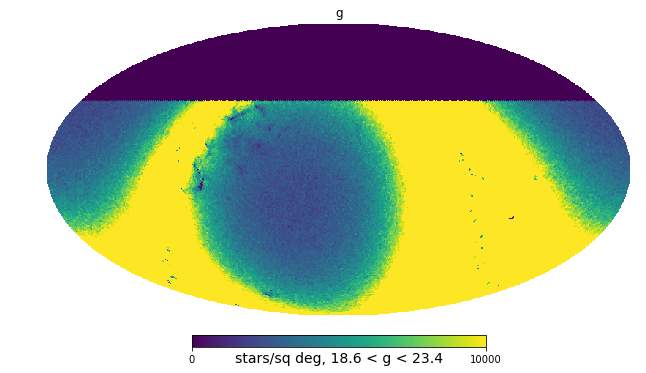

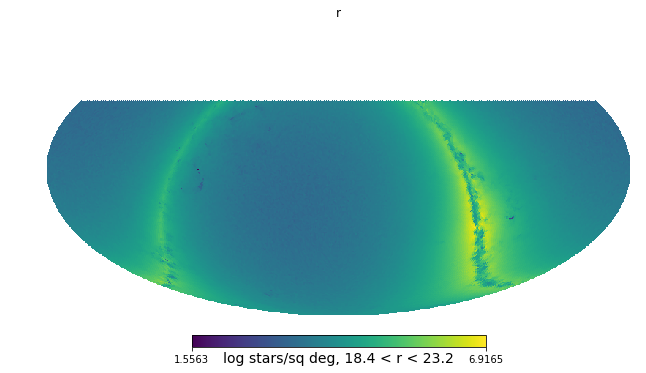

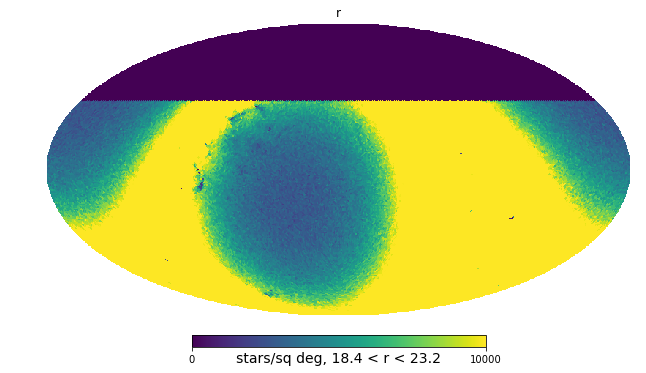

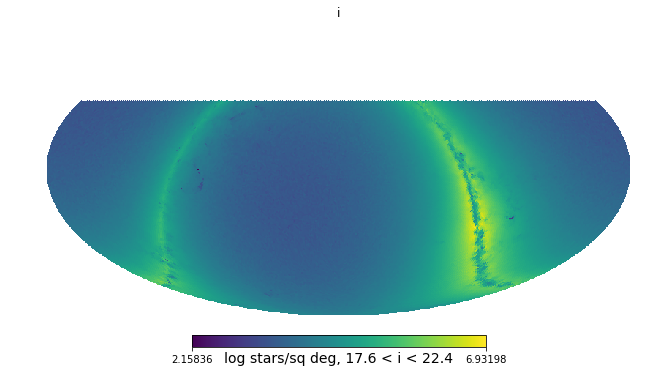

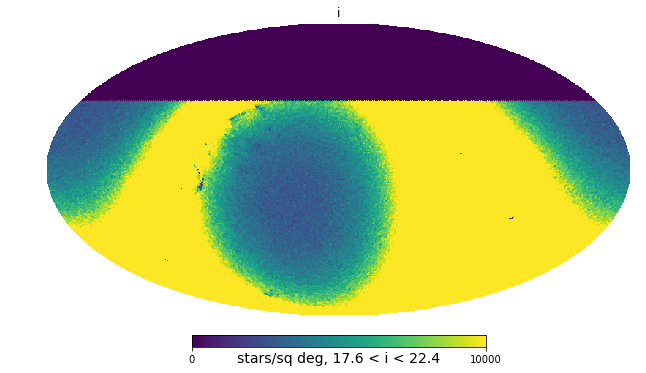

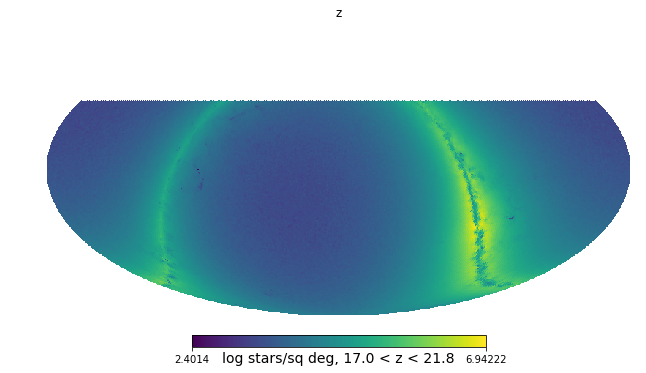

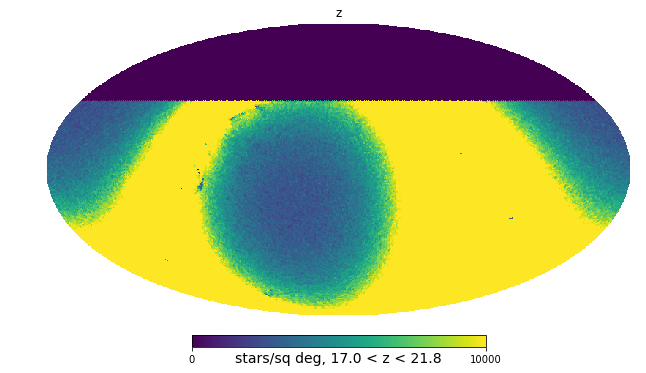

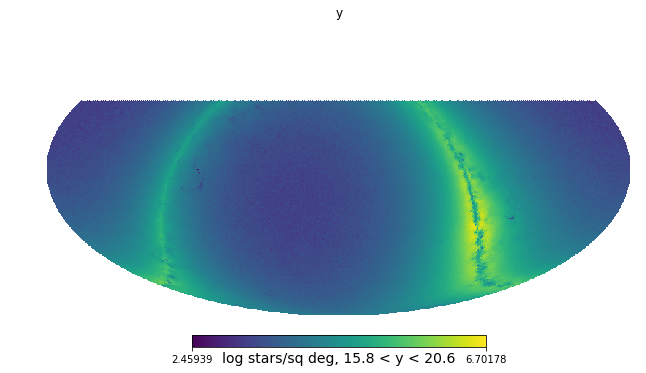

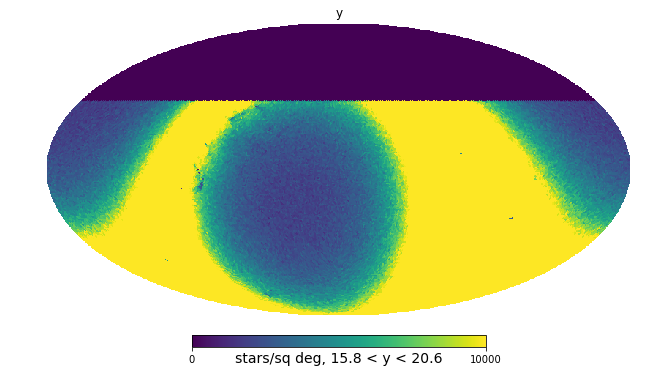

In [9]:
srd_depths = {'g': 25.0, 'i': 24.0, 'r': 24.7, 'u': 23.9, 'y': 22.1, 'z': 23.3} # single visits

for filterName in filters:
    data = np.load('../StarMaps/starDensity_%s_nside_64.npz' % filterName)
    starDensity = data['starDensity'].copy()
    bins=data['bins'].copy()
    m2 = srd_depths[filterName] - 1.5
    m1 = m2 - 5.0 
    good = np.where((bins >= m1) & (bins <= m2))[0]
    starmap = starDensity[:,good.max()-1] - starDensity[:,good.min()-1]
    
    hp.mollview(np.log10(starmap), unit='log stars/sq deg, %.1f < %s < %.1f' % (bins[good].min(), 
                                                                                filterName, bins[good].max()), 
                title=filterName)
    hp.mollview(starmap, unit='stars/sq deg, %.1f < %s < %.1f' % (bins[good].min(), filterName, 
                                                                  bins[good].max()), max=10000, 
                title=filterName)
    result_table.append(stars_at_point(starDensity, bins, m2))

In [11]:
print('filter,  (0,0),  (l=0,b=10), (0,-75) ')
print('r=20', result_table[0])
for i,filtername in enumerate(filters):
    print(filtername, result_table[i+1])

filter,  (0,0),  (l=0,b=10), (0,-75) 
r=20 [1440.0000000000095, 124704.00000000141, 3384.0000000000255]
u [1764.0000000000268, 133164.00000000175, 4212.000000000031]
g [4050.000000000038, 363780.0000000023, 8568.000000000076]
r [4536.0000000000255, 455400.0000000031, 10224.000000000113]
i [4518.000000000034, 463140.00000000384, 10242.0000000001]
z [3780.0000000000446, 427824.00000000367, 9540.000000000076]
y [2628.000000000038, 288252.00000000274, 6372.000000000062]


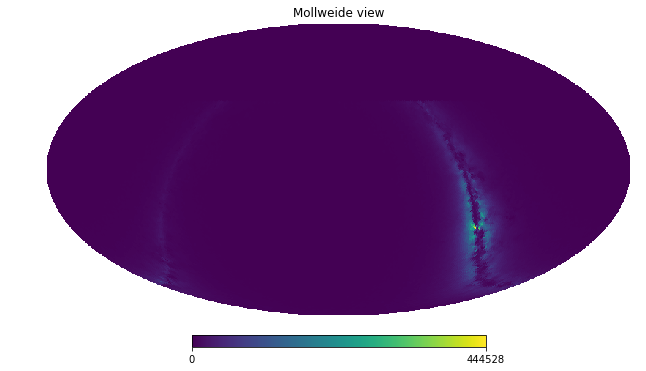

In [12]:
hp.mollview(starDensity[:,11])